<a href="https://colab.research.google.com/github/grzn20/PROYECTOS-PORTAFOLIO/blob/main/Gerson_Barreto_Herrera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [ ]:
# Importarmos la data
sales = pd.read_csv('/content/drive/MyDrive/datasets/SalesDemand (1).csv',encoding='latin-1', sep = ';')

<ipython-input-14-d078760aee99>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  sales = pd.read_csv('/content/drive/MyDrive/datasets/SalesDemand (1).csv',encoding='latin-1', sep = ';')


In [ ]:
#Validamos el dataframe
sales.head()

,date,store,item,sales
0,1/01/2013,1.0,1.0,13.0
1,2/01/2013,1.0,1.0,11.0
2,3/01/2013,1.0,1.0,14.0
3,4/01/2013,1.0,1.0,13.0
4,5/01/2013,1.0,1.0,10.0


In [ ]:
#verificamos los tipos de datos
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958000 entries, 0 to 957999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    913000 non-null  object 
 1   store   913000 non-null  float64
 2   item    913000 non-null  float64
 3   sales   913000 non-null  float64
dtypes: float64(3), object(1)
memory usage: 29.2+ MB


In [ ]:
#verificamos las ultimas filas
sales.tail()

,date,store,item,sales
957995,NaN,NaN,NaN,NaN
957996,NaN,NaN,NaN,NaN
957997,NaN,NaN,NaN,NaN
957998,NaN,NaN,NaN,NaN
957999,NaN,NaN,NaN,NaN


In [ ]:
#Eliminamos la ultima fila que no tiene registros11111
sales = sales.dropna()
sales.tail()

,date,store,item,sales
912995,27/12/2017,10.0,50.0,63.0
912996,28/12/2017,10.0,50.0,59.0
912997,29/12/2017,10.0,50.0,74.0
912998,30/12/2017,10.0,50.0,62.0
912999,31/12/2017,10.0,50.0,82.0


In [ ]:
#convertimos la columna date de object datetime
sales['date'] = pd.to_datetime(sales['date'], format='%d/%m/%Y')
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  float64       
 2   item    913000 non-null  float64       
 3   sales   913000 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 34.8 MB


In [ ]:
y = sales.set_index('date')
y.head()

,store,item,sales
date,,,
2013-01-01,1.0,1.0,13.0
2013-01-02,1.0,1.0,11.0
2013-01-03,1.0,1.0,14.0
2013-01-04,1.0,1.0,13.0
2013-01-05,1.0,1.0,10.0


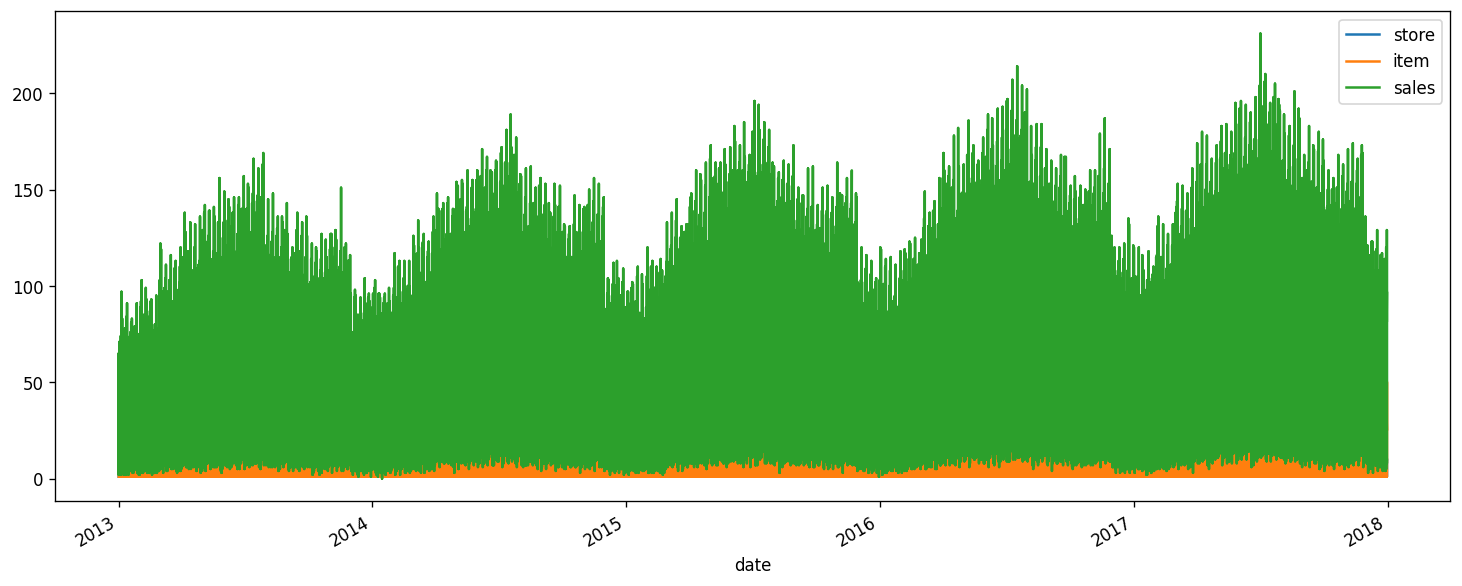

In [ ]:
#visualizamos las ventas
y.plot(figsize=(15, 6))
plt.show()

In [ ]:
#Verificamos los valores unicos en las columnas store y item
print(y['store'].unique())
print(y['item'].unique())

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]


visualizamos que hay 10 tiendas y 30 tipos de productos diferentes

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2013-01-31 to 2017-12-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   60 non-null     float64
dtypes: float64(1)
memory usage: 960.0 bytes


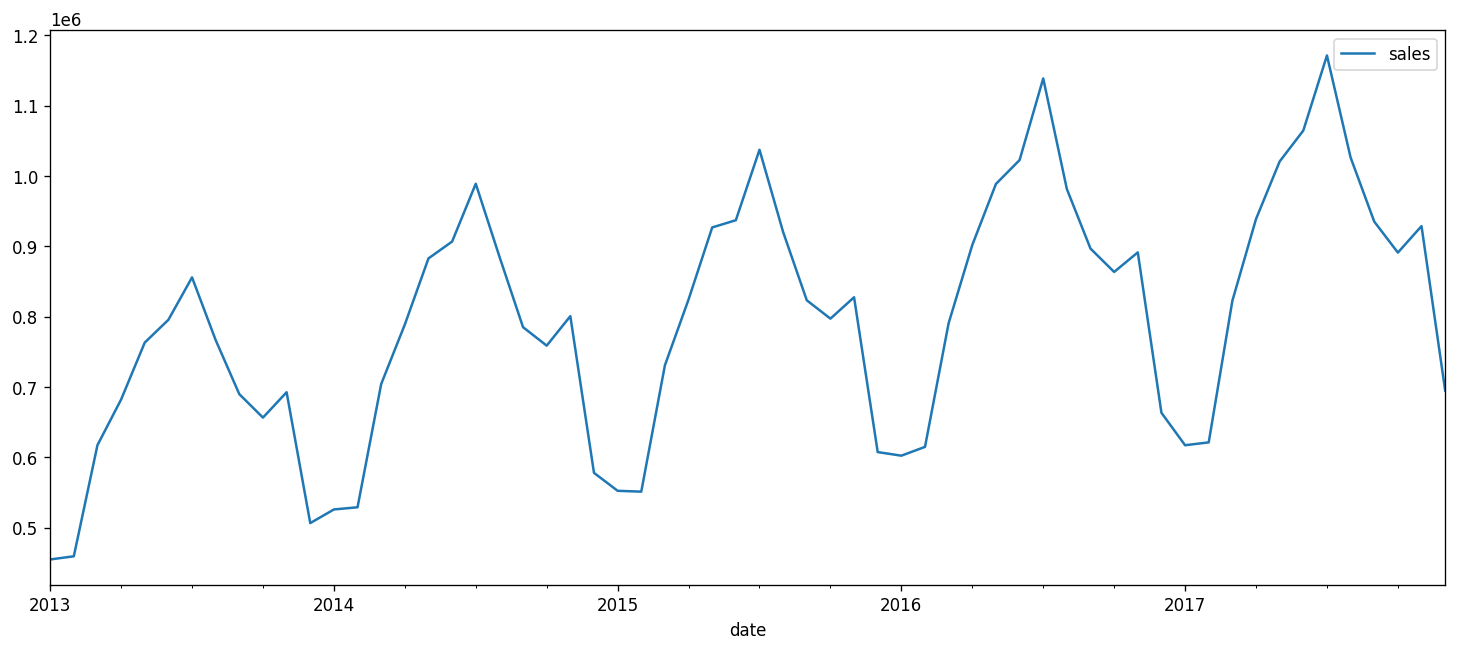

In [ ]:
#agrupamos el total de ventas, de diario a mensual
venta_mes = sales.groupby(pd.Grouper(key='date', freq='M')).agg({'sales': 'sum'})
venta_mes.plot(figsize=(15, 6))
venta_mes.info()
plt.show()

En Ventas totales mensuales apreciamos una tendencia alcista ciclica

#Aplicamos modelo prophet

In [ ]:
Ventas_dia = sales.groupby(['date'])['sales'].sum().reset_index()
Ventas_dia= Ventas_dia.set_index('date')
print(Ventas_dia)

              sales
date               
2013-01-01  13696.0
2013-01-02  13678.0
2013-01-03  14488.0
2013-01-04  15677.0
2013-01-05  16237.0
...             ...
2017-12-27  20378.0
2017-12-28  21885.0
2017-12-29  23535.0
2017-12-30  24988.0
2017-12-31  26420.0

[1826 rows x 1 columns]


In [ ]:
store10_ventas = sales.loc[sales['store'] == 10 ] 
store_ventas_agrup10 = store10_ventas.groupby(['date'])['sales'].sum().reset_index()
venta_mes_store10 = store_ventas_agrup10.groupby(pd.Grouper(key='date', freq='M')).agg({'sales': 'sum'})
venta_mes_store10 = venta_mes_store10.set_index('date')
print(store_ventas_agrup10)

             sales
date              
2013-01-01  1521.0
2013-01-02  1530.0
2013-01-03  1654.0
2013-01-04  1739.0
2013-01-05  1841.0
...            ...
2017-12-27  2221.0
2017-12-28  2429.0
2017-12-29  2687.0
2017-12-30  2742.0
2017-12-31  2939.0

[1826 rows x 1 columns]


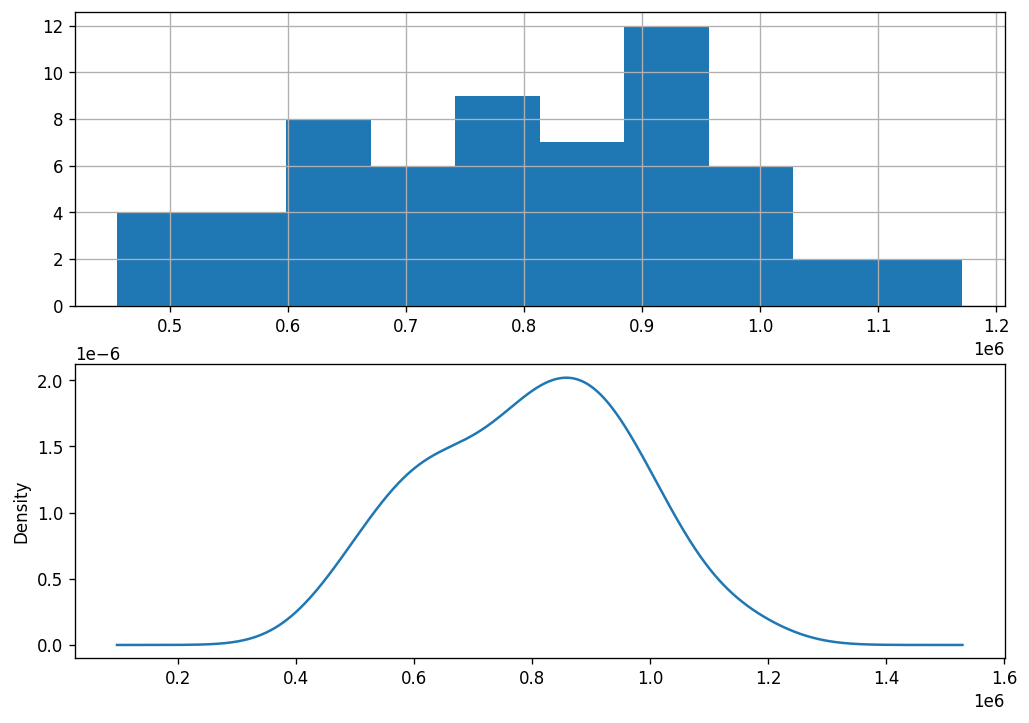

In [ ]:
from pandas import Series
from matplotlib import pyplot
pyplot.figure(1)
pyplot.subplot(211)
venta_mes.sales.hist()
pyplot.subplot(212)
venta_mes.sales.plot(kind='kde')
pyplot.show()

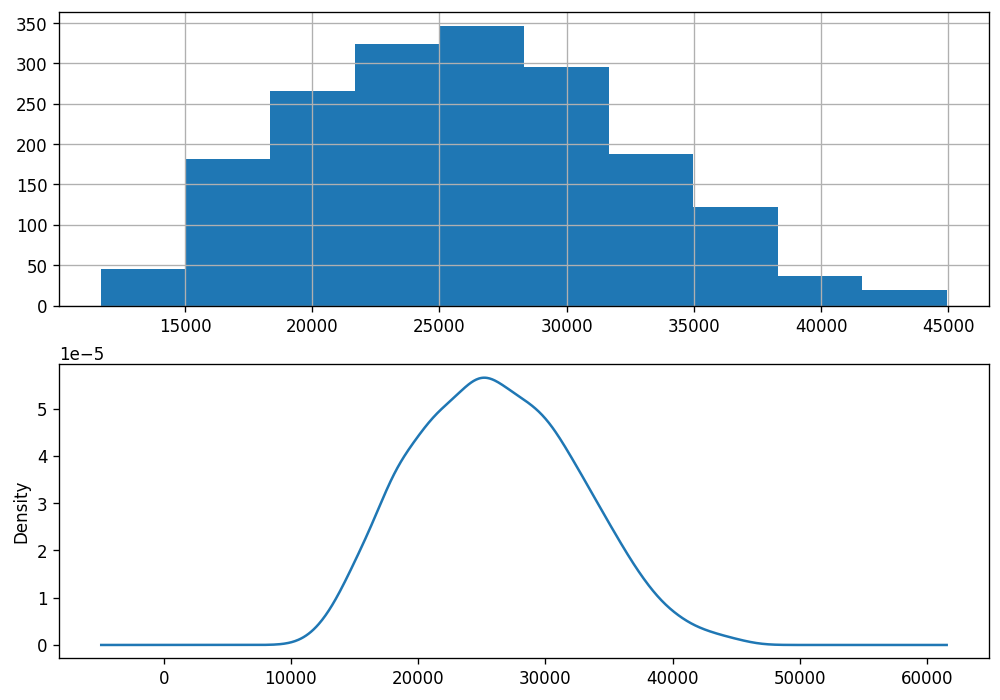

In [ ]:
pyplot.figure(1)
pyplot.subplot(211)
Ventas_dia.sales.hist()
pyplot.subplot(212)
Ventas_dia.sales.plot(kind='kde')
pyplot.show()

Trabajamos con el modelo prophet la data total de ventas por mes



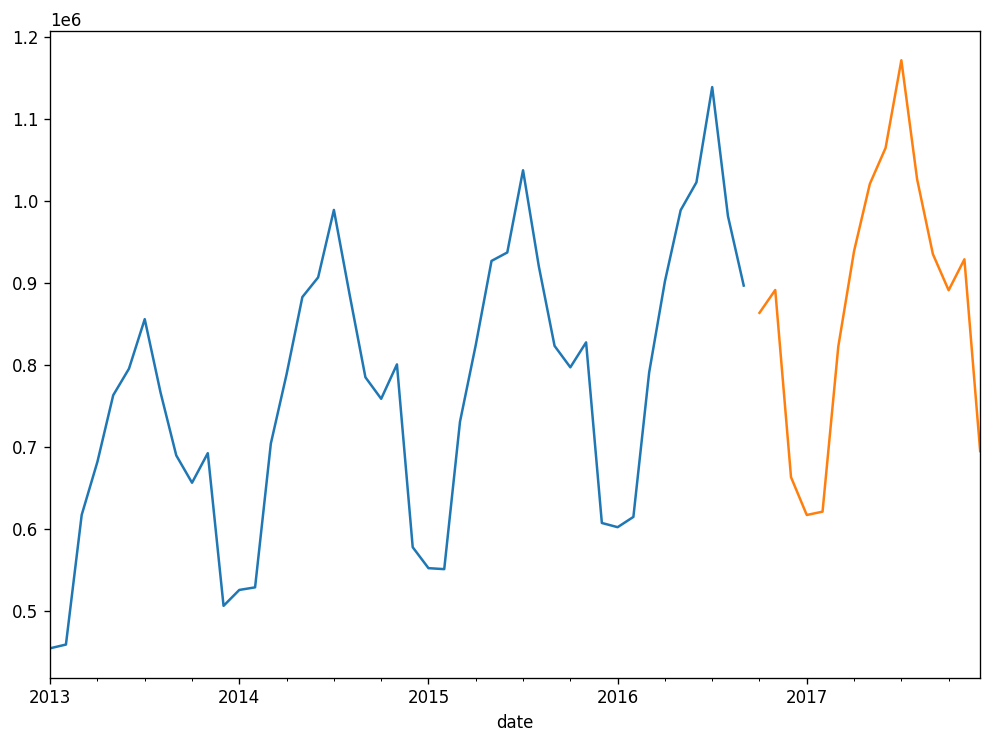

In [ ]:
#divide into train and validation set
train = venta_mes[:int(0.75*(len(venta_mes)))]
valid = venta_mes[int(0.75*(len(venta_mes))):]

#plotting the data
train['sales'].plot()
valid['sales'].plot()
plt.show()

In [ ]:
train.head()

,sales
date,
2013-01-31,454904.0
2013-02-28,459417.0
2013-03-31,617382.0
2013-04-30,682274.0
2013-05-31,763242.0


In [ ]:
train_prophet = pd.DataFrame()
train_prophet['ds'] = train.index
train_prophet['y'] = train.sales.values

In [ ]:
train_prophet.head()

,ds,y
0,2013-01-31,454904.0
1,2013-02-28,459417.0
2,2013-03-31,617382.0
3,2013-04-30,682274.0
4,2013-05-31,763242.0


In [ ]:
import os
# Let cmdstanpy know where CmdStan is
os.environ["CMDSTAN"] = "./cmdstan-2.23.0"

from prophet import Prophet

In [ ]:
#instantiate Prophet with only yearly seasonality as our data is monthly 
model = Prophet()
model.fit(train_prophet) #fit the model with your dataframe

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzhbj28kd/0gvqs87k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzhbj28kd/j2f7f12m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21254', 'data', 'file=/tmp/tmpzhbj28kd/0gvqs87k.json', 'init=/tmp/tmpzhbj28kd/j2f7f12m.json', 'output', 'file=/tmp/tmpzhbj28kd/prophet_model2er495tz/prophet_model-20230415181045.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:10:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# predict for five months in the furure and MS - month start is the frequency
future = model.make_future_dataframe(periods = 15, freq = 'MS') 
future

,ds
0,2013-01-31
1,2013-02-28
2,2013-03-31
3,2013-04-30
4,2013-05-31
5,2013-06-30
6,2013-07-31
7,2013-08-31
8,2013-09-30
9,2013-10-31


In [ ]:
# now lets make the forecasts
forecast = model.predict(future)
forecast[['ds', 'yhat']]

,ds,yhat
0,2013-01-31,4.571156e+05
1,2013-02-28,4.433152e+05
2,2013-03-31,6.067796e+05
3,2013-04-30,6.900039e+05
4,2013-05-31,7.729720e+05
5,2013-06-30,7.972418e+05
6,2013-07-31,8.828683e+05
7,2013-08-31,7.658616e+05
8,2013-09-30,6.838099e+05
9,2013-10-31,6.621553e+05


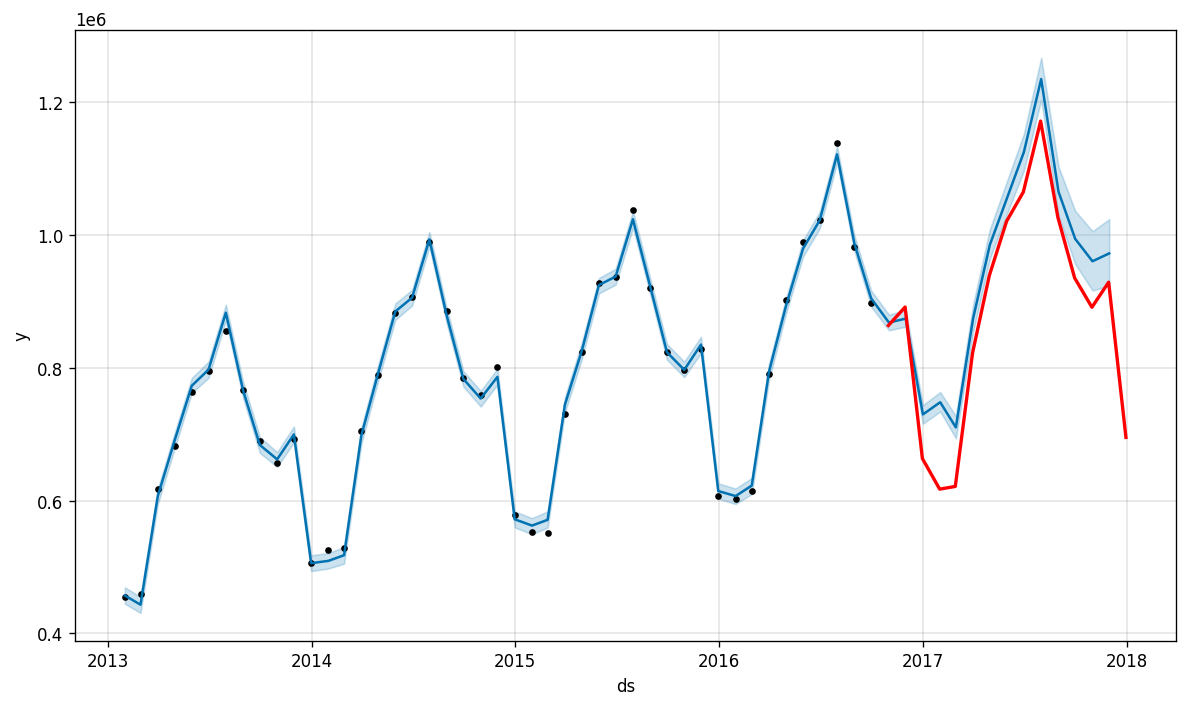

In [ ]:
fig = model.plot(forecast)
#plot the predictions for validation set

plt.plot(valid, label='Valid', color = 'red', linewidth = 2)

plt.show()

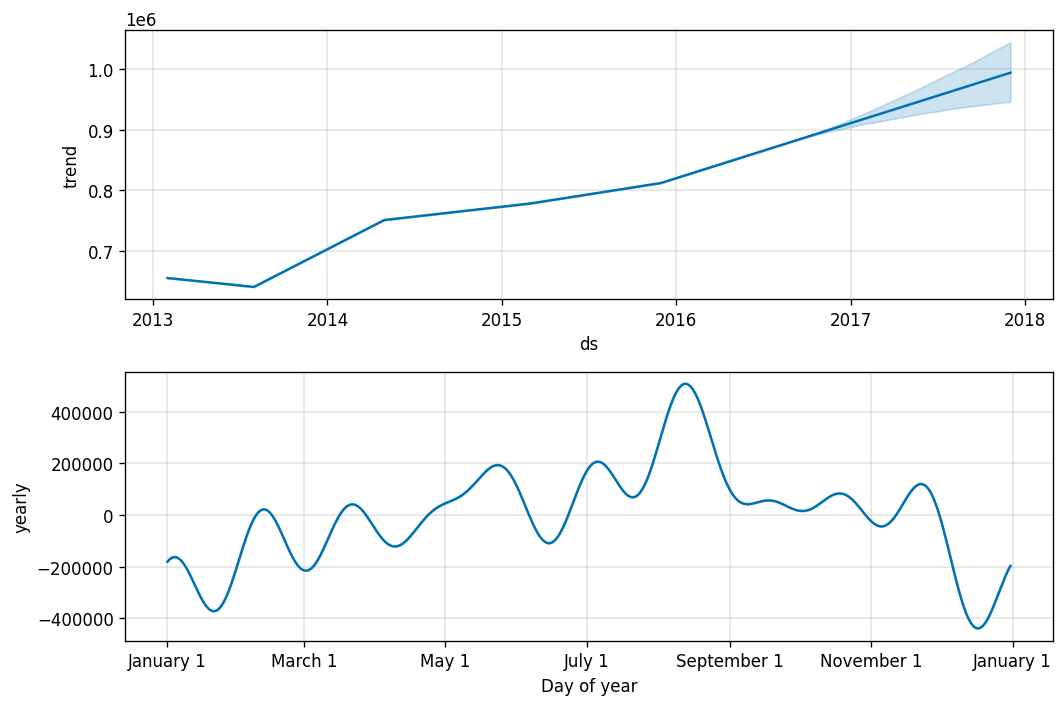

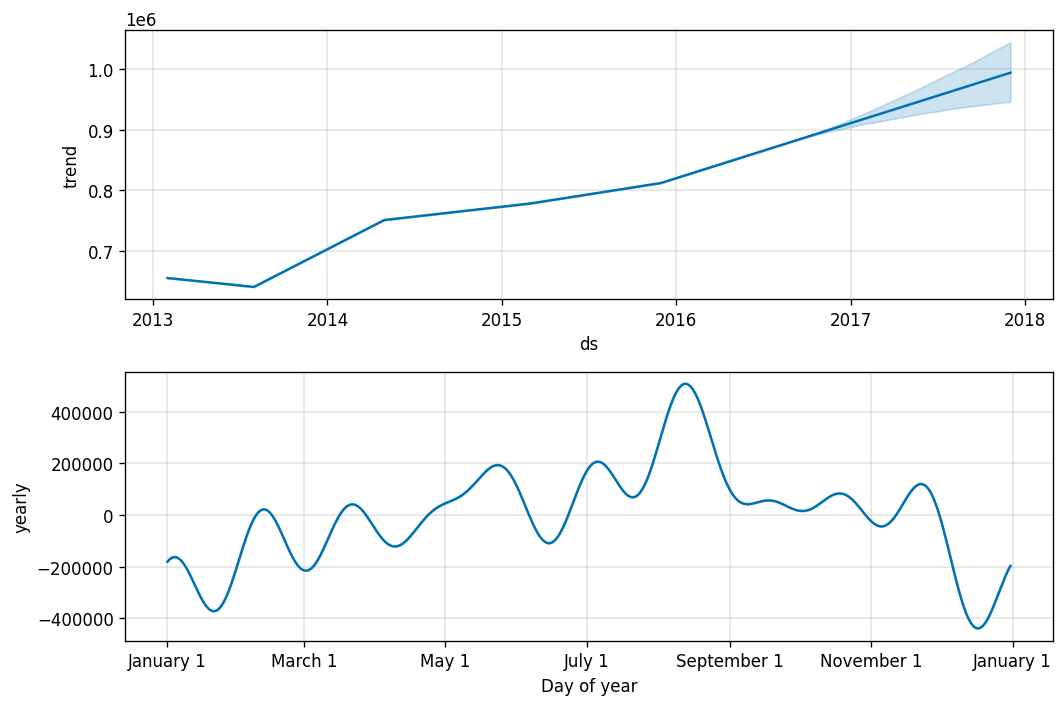

In [ ]:
model.plot_components(forecast)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

In [ ]:
def evaluate_forecast(venta_mes, pred):
    results = pd.DataFrame({'r2_score':r2_score(venta_mes, pred),
                           }, index=[0])
    results['mean_absolute_error'] = mean_absolute_error(venta_mes, pred)
    results['median_absolute_error'] = median_absolute_error(venta_mes, pred)
    results['mse'] = mean_squared_error(venta_mes, pred)
    results['msle'] = mean_squared_log_error(venta_mes, pred)
    results['rmse'] = np.sqrt(results['mse'])
    return results

In [ ]:
evaluate_forecast(venta_mes, forecast.yhat)

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,rmse
0,0.859401,30789.234383,7804.453796,4.133158e+09,0.005932,64289.637799


Trabajamos la data de ventas total diaria

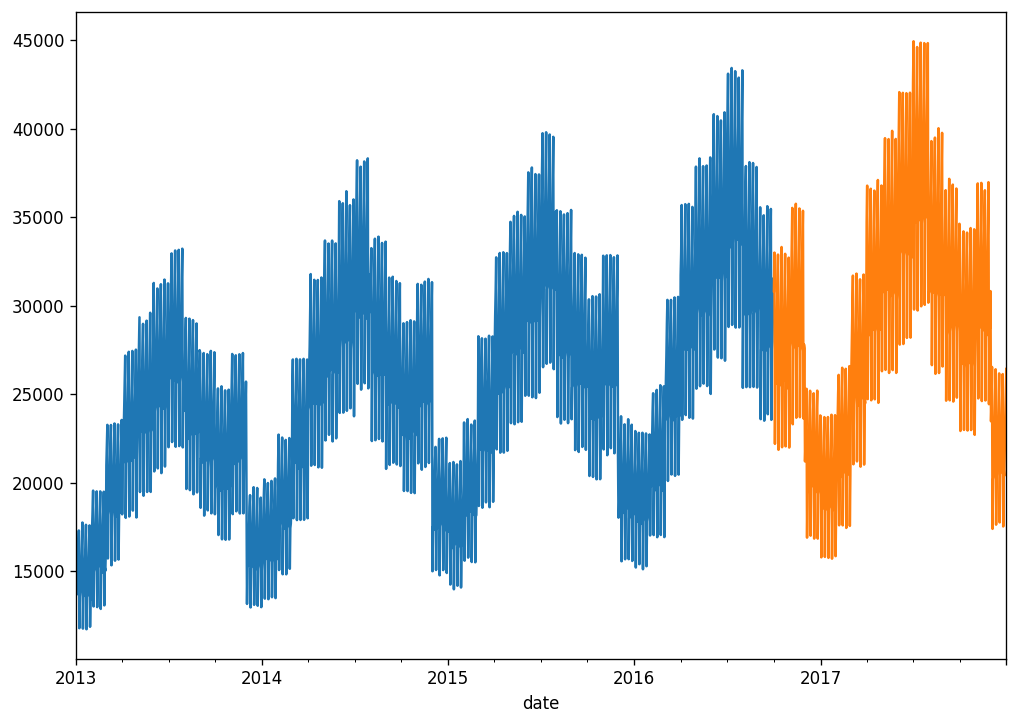

In [ ]:
#divide into train and validation set
train = Ventas_dia[:int(0.75*(len(Ventas_dia)))]
valid = Ventas_dia[int(0.75*(len(Ventas_dia))):]

#plotting the data
train['sales'].plot()
valid['sales'].plot()
plt.show()

In [ ]:
train.head(5)

,sales
date,
2013-01-01,13696.0
2013-01-02,13678.0
2013-01-03,14488.0
2013-01-04,15677.0
2013-01-05,16237.0


In [ ]:
train_prophet = pd.DataFrame()
train_prophet['ds'] = train.index
train_prophet['y'] = train.sales.values

In [ ]:
train_prophet.head()

,ds,y
0,2013-01-01,13696.0
1,2013-01-02,13678.0
2,2013-01-03,14488.0
3,2013-01-04,15677.0
4,2013-01-05,16237.0


In [ ]:
#instantiate Prophet with only yearly seasonality as our data is monthly 
model = Prophet()
model.fit(train_prophet) #fit the model with your dataframe

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzhbj28kd/bfpqkypl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzhbj28kd/lqykkkl3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3341', 'data', 'file=/tmp/tmpzhbj28kd/bfpqkypl.json', 'init=/tmp/tmpzhbj28kd/lqykkkl3.json', 'output', 'file=/tmp/tmpzhbj28kd/prophet_model3hrtpky5/prophet_model-20230415194229.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:42:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:42:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# predict for five months in the furure and MS - month start is the frequency
future = model.make_future_dataframe(periods = 457, freq = 'MS') 
future

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
1821,2054-06-01
1822,2054-07-01
1823,2054-08-01
1824,2054-09-01


In [ ]:
# now lets make the forecasts
forecast = model.predict(future)
forecast[['ds', 'yhat']]

,ds,yhat
0,2013-01-01,13124.816703
1,2013-01-02,13118.666357
2,2013-01-03,14700.887077
3,2013-01-04,16354.263906
4,2013-01-05,17959.339377
...,...,...
1821,2054-06-01,162885.209716
1822,2054-07-01,168270.427868
1823,2054-08-01,172356.392111
1824,2054-09-01,164803.834726


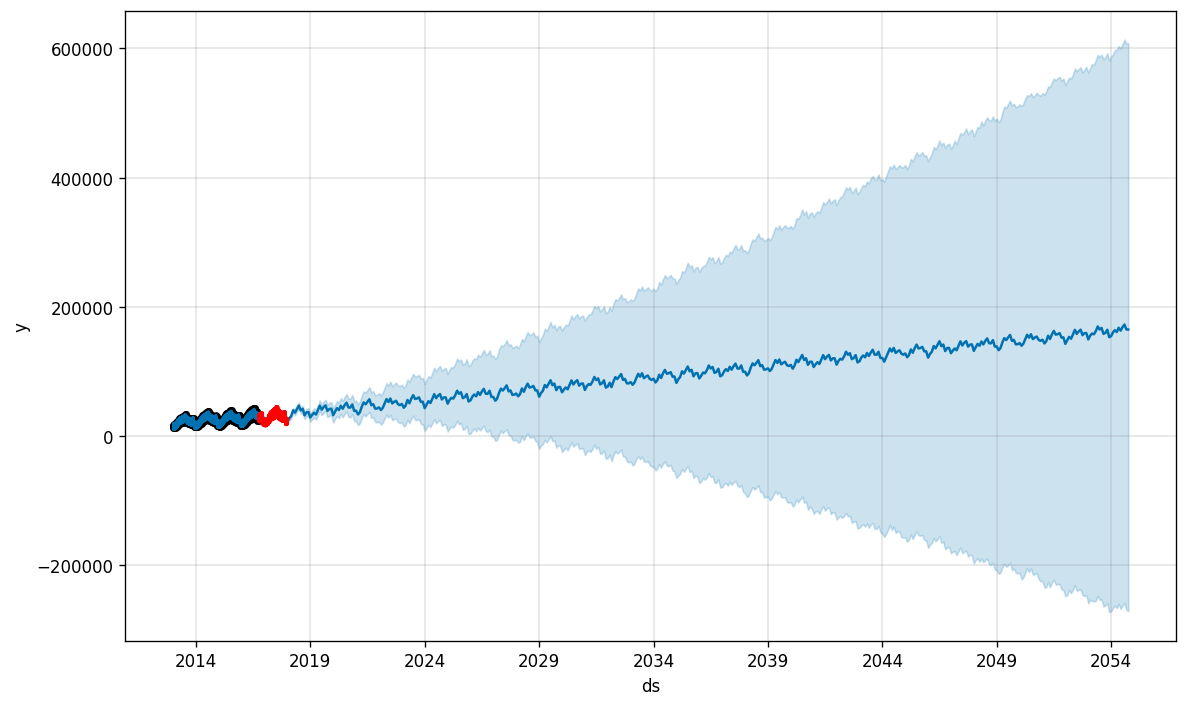

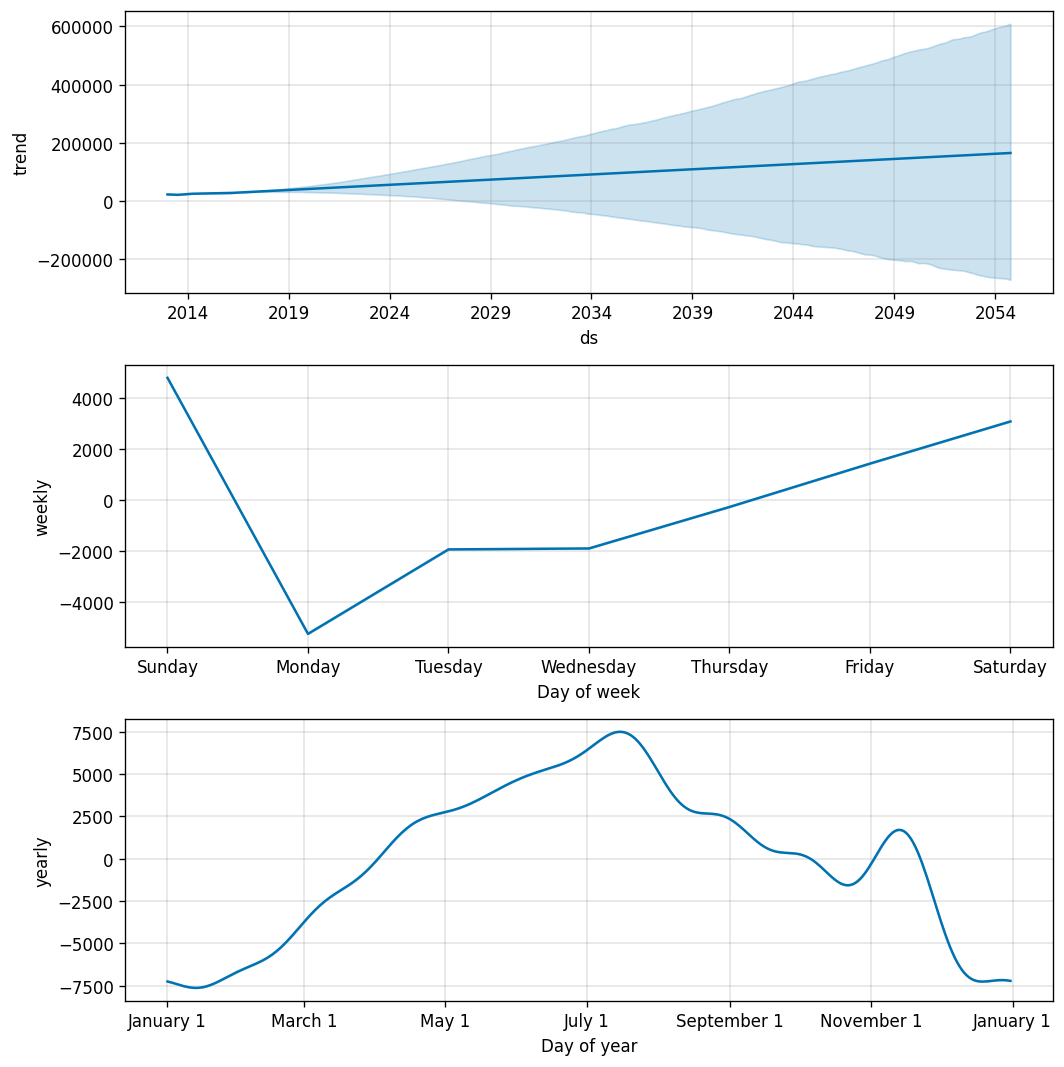

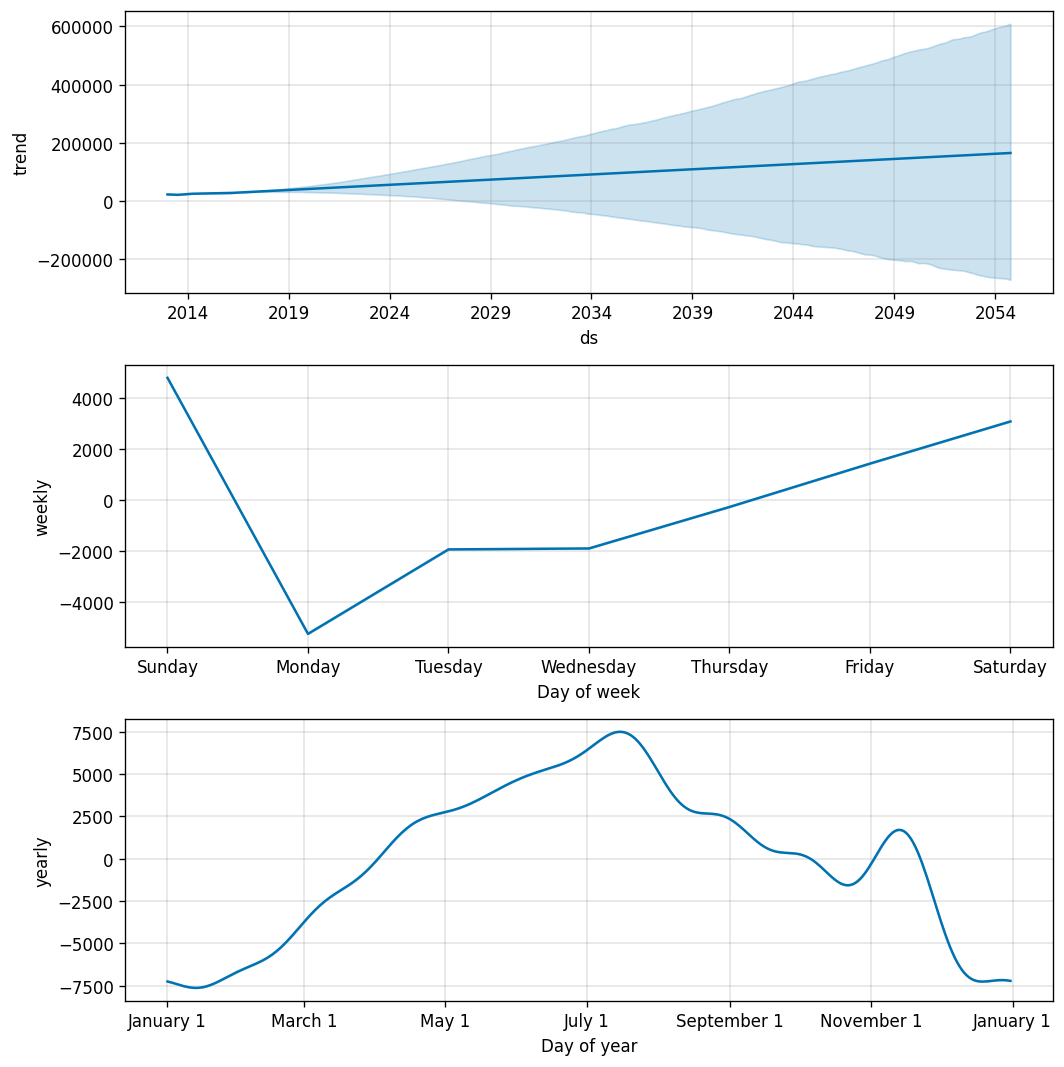

In [ ]:
fig = model.plot(forecast)
#plot the predictions for validation set

plt.plot(valid, label='Valid', color = 'red', linewidth = 2)

plt.show()
model.plot_components(forecast)

In [ ]:
def evaluate_forecast(Ventas_dia, pred):
    results = pd.DataFrame({'r2_score':r2_score(Ventas_dia, pred),
                           }, index=[0])
    results['mean_absolute_error'] = mean_absolute_error(Ventas_dia, pred)
    results['median_absolute_error'] = median_absolute_error(Ventas_dia, pred)
    results['mse'] = mean_squared_error(Ventas_dia, pred)
    results['msle'] = mean_squared_log_error(Ventas_dia, pred)
    results['rmse'] = np.sqrt(results['mse'])
    return results

In [ ]:
evaluate_forecast(Ventas_dia, forecast.yhat)

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,rmse
0,-36.327487,17747.904389,951.723794,1.536834e+09,0.381098,39202.469126


###Analisis de aplicacion de modelo con diferente estacionalidad

En los resultado del coeficiente de determinacion en estacionalidad mensual nos genera una resultado de 0.98 en comparacion a la estacionalidad diaria -36.32 que esta demaciado lejos de ser eficiente para trabajar en las siguientes agrupaciones por tienda.



In [ ]:
#Agrupaciòn con item 1
item1_ventas = sales.loc[sales['item'] == 1 ] 
item1_ventas_agrup = item1_ventas.groupby(['date'])['sales'].sum().reset_index()
item1_ventas_agrup = item1_ventas_agrup.groupby(pd.Grouper(key='date', freq='M')).agg({'sales': 'sum'})
item1_ventas_agrup.head()

,sales
date,
2013-01-31,3794.0
2013-02-28,3863.0
2013-03-31,5190.0
2013-04-30,5783.0
2013-05-31,6298.0


In [152]:
#Agrupaciòn con tienda 10
store10_ventas = sales.loc[sales['store'] == 10 ] 
store_ventas_agrup10 = store10_ventas.groupby(['date'])['sales'].sum().reset_index()
store_ventas_agrup10 = store_ventas_agrup10.groupby(pd.Grouper(key='date', freq='M')).agg({'sales': 'sum'})
store_ventas_agrup10.head()

,sales
date,
2013-01-31,51095.0
2013-02-28,51624.0
2013-03-31,69249.0
2013-04-30,76791.0
2013-05-31,86210.0


#Tecnica de suavizamiento en Item 01



In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import matplotlib.pyplot as plt

<Axes: title={'center': 'Single Exponential Smoothing'}, xlabel='date'>

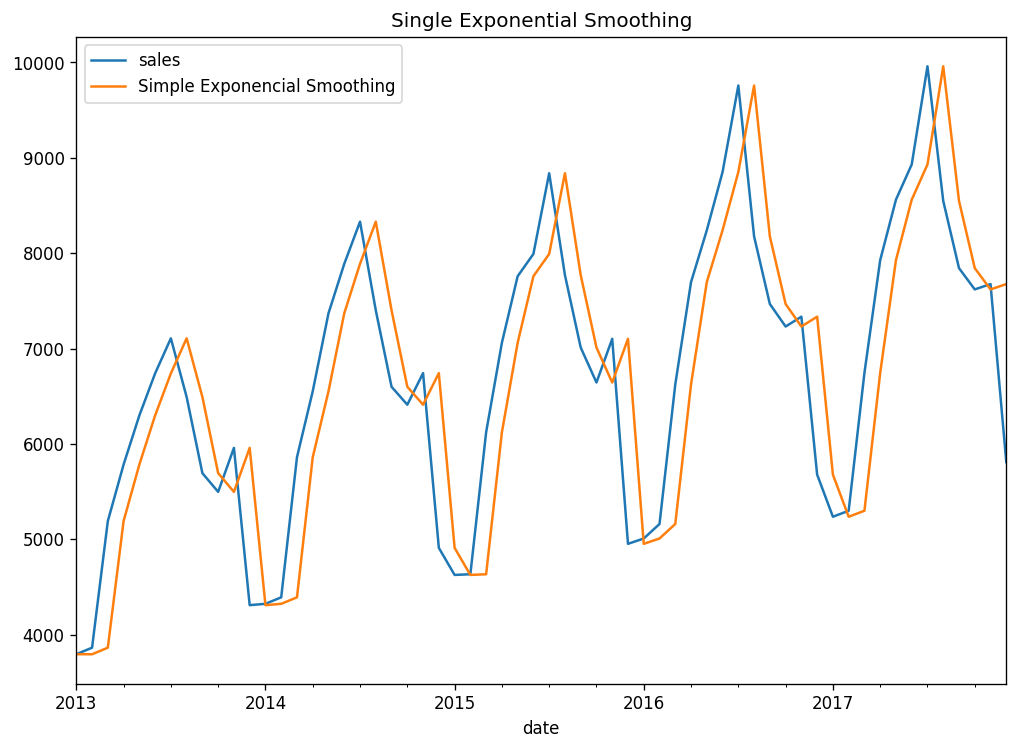

In [ ]:
HWES1 = SimpleExpSmoothing(item1_ventas_agrup, initialization_method="estimated").fit()
HWES1_fitted = HWES1.fittedvalues
HWES1_fitted.name = 'Simple Exponencial Smoothing'
pd.concat([item1_ventas_agrup, HWES1_fitted], axis=1).plot(title='Single Exponential Smoothing')

In [ ]:
results = pd.DataFrame(
    index=["SSE", "AIC", "BIC"])
results["Simple Exponencial"] = [HWES1.sse] + [HWES1.aic] + [HWES1.bic] 

In [ ]:
print(HWES1.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  sales   No. Observations:                   60
Model:             SimpleExpSmoothing   SSE                       48539885.798
Optimized:                       True   AIC                            820.213
Trend:                           None   BIC                            824.402
Seasonal:                        None   AICC                           820.940
Seasonal Periods:                None   Date:                 Sat, 15 Apr 2023
Box-Cox:                        False   Time:                         20:23:27
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
initial_level              3794.6748                

## Double exponencial smoothing (DES)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


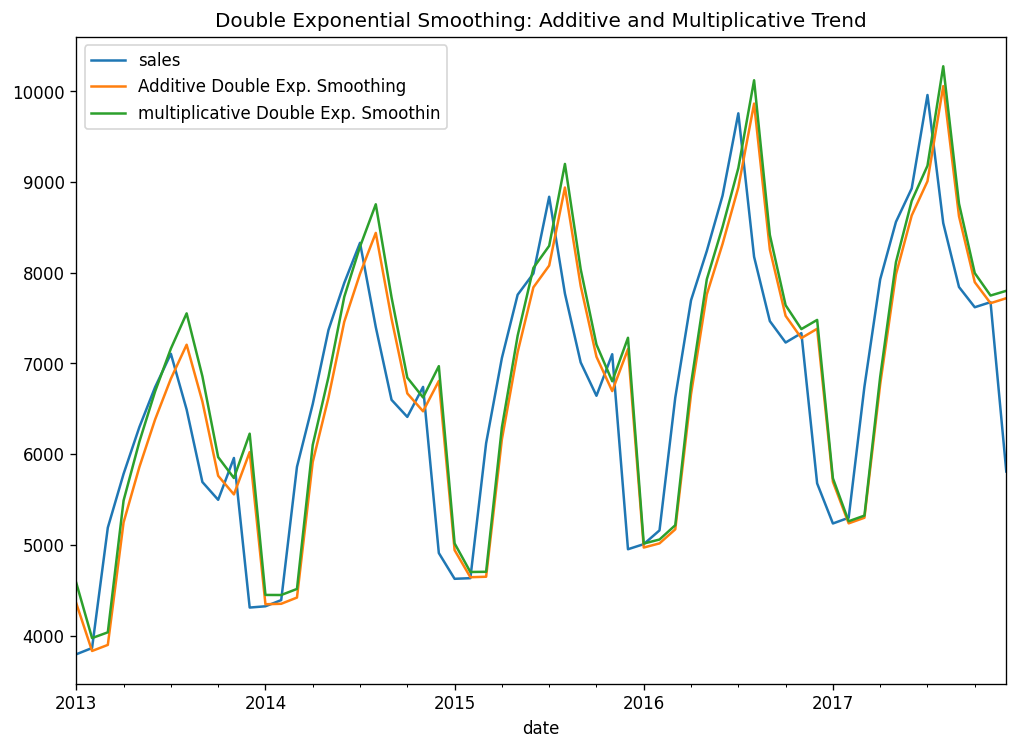

In [ ]:
HWES2_ADD = ExponentialSmoothing(item1_ventas_agrup,trend='add').fit()#.fittedvalues
HWES2_MUL = ExponentialSmoothing(item1_ventas_agrup,trend='mul').fit()#.fittedvalues
HWES2_ADD_fitted = HWES2_ADD.fittedvalues
HWES2_MUL_fitted = HWES2_MUL.fittedvalues
HWES2_ADD_fitted.name = 'Additive Double Exp. Smoothing'
HWES2_MUL_fitted.name = 'multiplicative Double Exp. Smoothin'
pd.concat([item1_ventas_agrup, HWES2_ADD_fitted, HWES2_MUL_fitted], axis=1).plot(title='Double Exponential Smoothing: Additive and Multiplicative Trend');

In [ ]:
results["Double Exp. - Additive"] = [HWES2_ADD.sse] + [HWES2_ADD.aic] + [HWES2_ADD.bic] 
results["Double Exp. - Multiplicative"] = [HWES2_MUL.sse] + [HWES2_MUL.aic] + [HWES2_MUL.bic] 

In [ ]:
HWES2_MUL.summary()

Dep. Variable:,sales,No. Observations:,60
Model:,ExponentialSmoothing,SSE,54315326.436
Optimized:,True,AIC,830.958
Trend:,Multiplicative,BIC,839.336
Seasonal:,None,AICC,832.543
Seasonal Periods:,None,Date:,"Sat, 15 Apr 2023"
Box-Cox:,False,Time:,20:23:48
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
smoothing_trend,0.0473810,beta,True


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


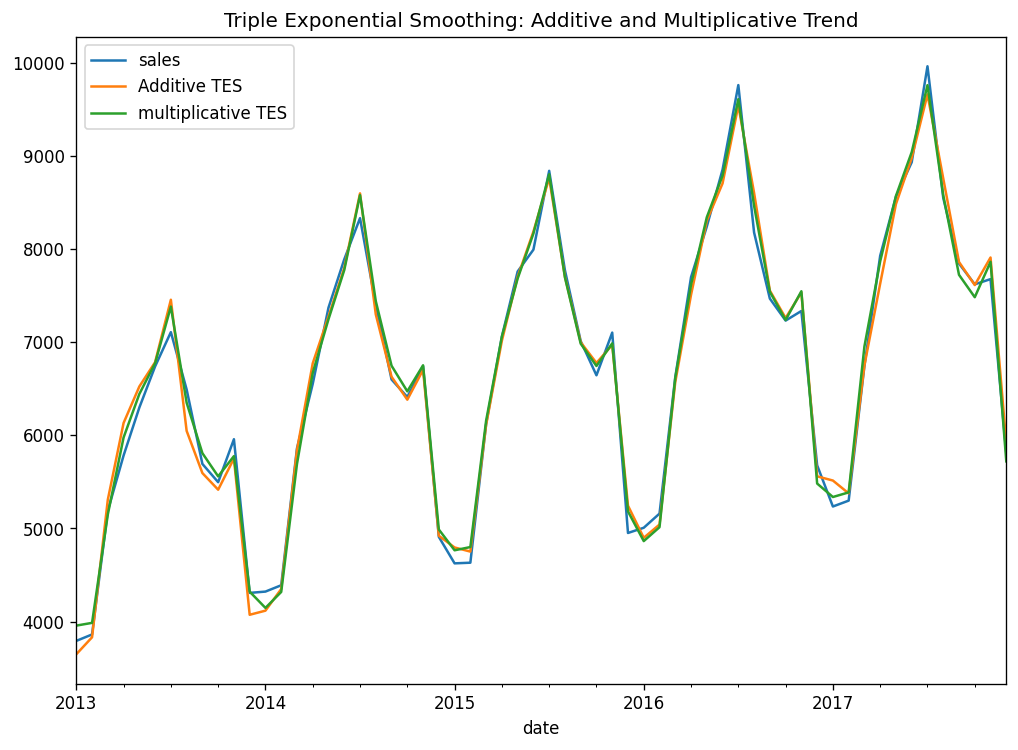

In [ ]:
HWES3_ADD = ExponentialSmoothing(item1_ventas_agrup,trend='add',seasonal='add',seasonal_periods=12).fit()
HWES3_MUL = ExponentialSmoothing(item1_ventas_agrup,trend='mul',seasonal='mul',seasonal_periods=12).fit()

HWES3_ADD_fitted = HWES3_ADD.fittedvalues
HWES3_MUL_fitted = HWES3_MUL.fittedvalues
HWES3_ADD_fitted.name = 'Additive TES'
HWES3_MUL_fitted.name = 'multiplicative TES'
pd.concat([item1_ventas_agrup, HWES3_ADD_fitted, HWES3_MUL_fitted], axis=1).plot(title='Triple Exponential Smoothing: Additive and Multiplicative Trend');

In [ ]:
results["Triple Exp. - Additive"] = [HWES3_ADD.sse] + [HWES3_ADD.aic] + [HWES3_ADD.bic] 
results["Triple Exp. - Multiplicative"] = [HWES3_MUL.sse] + [HWES3_MUL.aic] + [HWES3_MUL.bic] 

In [ ]:
results

,Simple Exponencial,Double Exp. - Additive,Double Exp. - Multiplicative,Triple Exp. - Additive,Triple Exp. - Multiplicative
SSE,4.853989e+07,4.990674e+07,5.431533e+07,1.816949e+06,1.070708e+06
AIC,8.202131e+02,8.258793e+02,8.309583e+02,6.510995e+02,6.193691e+02
BIC,8.244018e+02,8.342567e+02,8.393357e+02,6.846090e+02,6.528787e+02


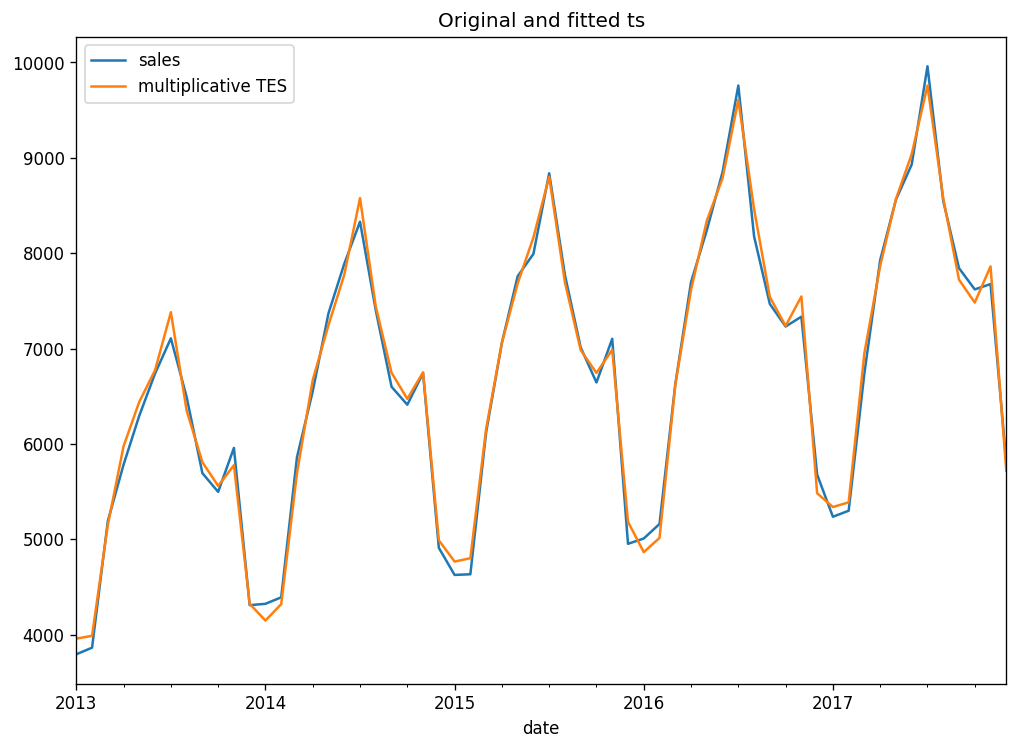

In [ ]:
pd.concat([item1_ventas_agrup, HWES3_MUL_fitted], axis=1).plot(title='Original and fitted ts');

In [ ]:
HWES3_MUL.summary()

Dep. Variable:,sales,No. Observations:,60
Model:,ExponentialSmoothing,SSE,1070707.557
Optimized:,True,AIC,619.369
Trend:,Multiplicative,BIC,652.879
Seasonal:,Multiplicative,AICC,636.052
Seasonal Periods:,12,Date:,"Sat, 15 Apr 2023"
Box-Cox:,False,Time:,20:24:50
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4292857,alpha,True
smoothing_trend,0.1129699,beta,True


In [ ]:
fit1 = ExponentialSmoothing(
    item1_ventas_agrup,
    seasonal_periods=12,
    trend="add",
    seasonal="add",
    initialization_method="estimated",
).fit()

fit2 = ExponentialSmoothing(
    item1_ventas_agrup,
    seasonal_periods=12,
    trend="add",
    seasonal="mul",
    initialization_method="estimated",
).fit()

fit3 = ExponentialSmoothing(
    item1_ventas_agrup,
    seasonal_periods=12,
    trend="mul",
    seasonal="add",
    initialization_method="estimated",
).fit()

fit4 = ExponentialSmoothing(
    item1_ventas_agrup,
    seasonal_periods=12,
    trend="mul",
    seasonal="mul",
    initialization_method="estimated",
).fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [ ]:
results2 = pd.DataFrame(
    index=["SSE", "AIC", "BIC"])

In [ ]:
results2["Holt Trend-Add Seas-Add"] = [fit1.sse] + [fit1.aic] + [fit1.bic]
results2["Holt Trend-Add Seas-Mul"] = [fit2.sse] + [fit2.aic] + [fit2.bic]
results2["Holt Trend-Mul Seas-Add"] = [fit3.sse] + [fit3.aic] + [fit3.bic]
results2["Holt Trend-Mul Seas-Mul"] = [fit4.sse] + [fit4.aic] + [fit4.bic]

In [ ]:
results2

,Holt Trend-Add Seas-Add,Holt Trend-Add Seas-Mul,Holt Trend-Mul Seas-Add,Holt Trend-Mul Seas-Mul
SSE,1.816949e+06,970058.957971,2.057174e+06,1.070708e+06
AIC,6.510995e+02,613.446054,6.585500e+02,6.193691e+02
BIC,6.846090e+02,646.955567,6.920595e+02,6.528787e+02


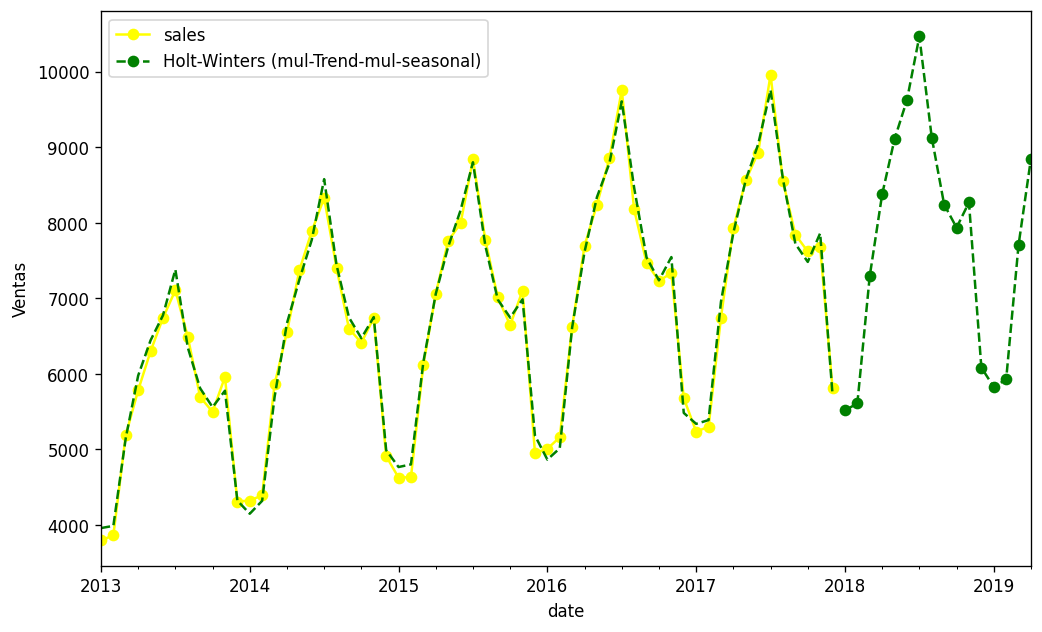

In [ ]:
ax = item1_ventas_agrup.plot(
    figsize=(10, 6),
    marker="o",
    color="yellow",
)

ax.set_ylabel("Ventas")
ax.set_xlabel("Mes")
fit4.fittedvalues.plot(ax=ax, style="--", color="green")
fit4.forecast(16).rename("Holt-Winters (mul-Trend-mul-seasonal)").plot(
    ax=ax, style="--", marker="o", color="green", legend=True
)

plt.show()

#Tecnica de Suavizamiento en Tienda 10

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: title={'center': 'Single Exponential Smoothing'}, xlabel='date'>

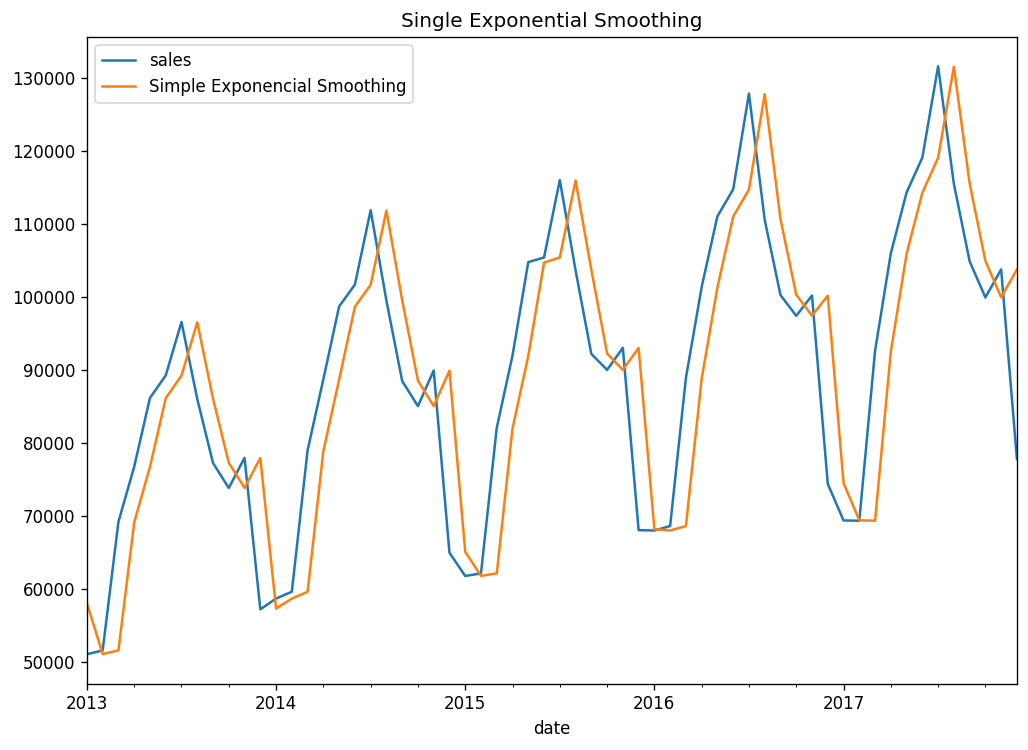

In [153]:
HWES1 = SimpleExpSmoothing(store_ventas_agrup10, initialization_method="estimated").fit()
HWES1_fitted = HWES1.fittedvalues
HWES1_fitted.name = 'Simple Exponencial Smoothing'
pd.concat([store_ventas_agrup10, HWES1_fitted], axis=1).plot(title='Single Exponential Smoothing')

In [154]:
results = pd.DataFrame(
    index=["SSE", "AIC", "BIC"])
results["Simple Exponencial"] = [HWES1.sse] + [HWES1.aic] + [HWES1.bic] 

In [155]:
print(HWES1.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  sales   No. Observations:                   60
Model:             SimpleExpSmoothing   SSE                     8567352206.453
Optimized:                       True   AIC                           1130.613
Trend:                           None   BIC                           1134.801
Seasonal:                        None   AICC                          1131.340
Seasonal Periods:                None   Date:                 Sat, 15 Apr 2023
Box-Cox:                        False   Time:                         20:34:27
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9950000                alpha                 True
initial_level              58101.000                

## Double exponencial smoothing (DES)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


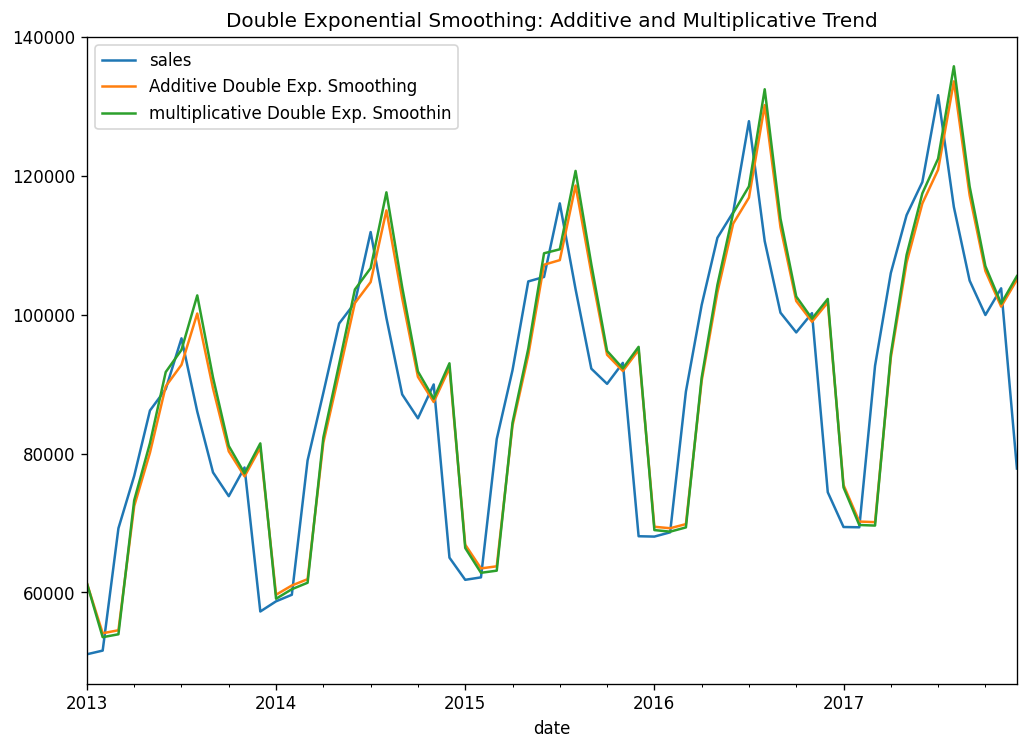

In [156]:
HWES2_ADD = ExponentialSmoothing(store_ventas_agrup10,trend='add').fit()#.fittedvalues
HWES2_MUL = ExponentialSmoothing(store_ventas_agrup10,trend='mul').fit()#.fittedvalues
HWES2_ADD_fitted = HWES2_ADD.fittedvalues
HWES2_MUL_fitted = HWES2_MUL.fittedvalues
HWES2_ADD_fitted.name = 'Additive Double Exp. Smoothing'
HWES2_MUL_fitted.name = 'multiplicative Double Exp. Smoothin'
pd.concat([store_ventas_agrup10, HWES2_ADD_fitted, HWES2_MUL_fitted], axis=1).plot(title='Double Exponential Smoothing: Additive and Multiplicative Trend');

In [157]:
results["Double Exp. - Additive"] = [HWES2_ADD.sse] + [HWES2_ADD.aic] + [HWES2_ADD.bic] 
results["Double Exp. - Multiplicative"] = [HWES2_MUL.sse] + [HWES2_MUL.aic] + [HWES2_MUL.bic] 

In [158]:
HWES2_MUL.summary()

Dep. Variable:,sales,No. Observations:,60
Model:,ExponentialSmoothing,SSE,9509485308.825
Optimized:,True,AIC,1140.873
Trend:,Multiplicative,BIC,1149.250
Seasonal:,None,AICC,1142.458
Seasonal Periods:,None,Date:,"Sat, 15 Apr 2023"
Box-Cox:,False,Time:,20:34:58
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
smoothing_trend,0.0473810,beta,True


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


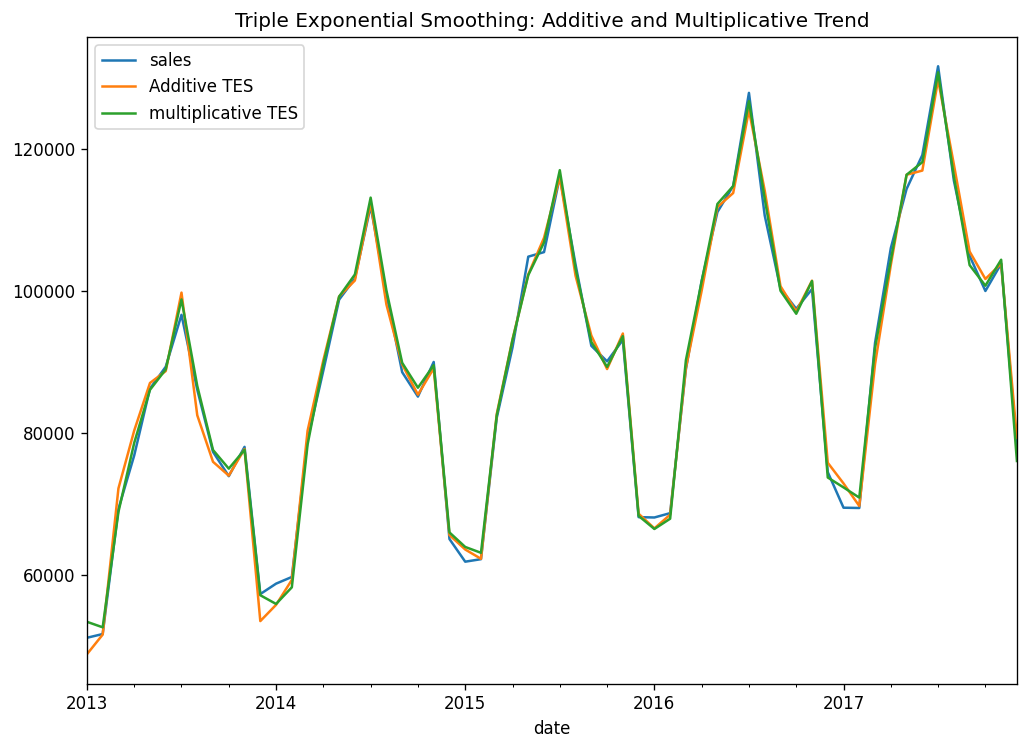

In [159]:
HWES3_ADD = ExponentialSmoothing(store_ventas_agrup10,trend='add',seasonal='add',seasonal_periods=12).fit()
HWES3_MUL = ExponentialSmoothing(store_ventas_agrup10,trend='mul',seasonal='mul',seasonal_periods=12).fit()

HWES3_ADD_fitted = HWES3_ADD.fittedvalues
HWES3_MUL_fitted = HWES3_MUL.fittedvalues
HWES3_ADD_fitted.name = 'Additive TES'
HWES3_MUL_fitted.name = 'multiplicative TES'
pd.concat([store_ventas_agrup10, HWES3_ADD_fitted, HWES3_MUL_fitted], axis=1).plot(title='Triple Exponential Smoothing: Additive and Multiplicative Trend');

In [160]:
results["Triple Exp. - Additive"] = [HWES3_ADD.sse] + [HWES3_ADD.aic] + [HWES3_ADD.bic] 
results["Triple Exp. - Multiplicative"] = [HWES3_MUL.sse] + [HWES3_MUL.aic] + [HWES3_MUL.bic] 

In [161]:
results

,Simple Exponencial,Double Exp. - Additive,Double Exp. - Multiplicative,Triple Exp. - Additive,Triple Exp. - Multiplicative
SSE,8.567352e+09,8.884722e+09,9.509485e+09,1.827323e+08,9.293719e+07
AIC,1.130613e+03,1.136795e+03,1.140873e+03,9.277513e+02,8.871854e+02
BIC,1.134801e+03,1.145173e+03,1.149250e+03,9.612608e+02,9.206949e+02


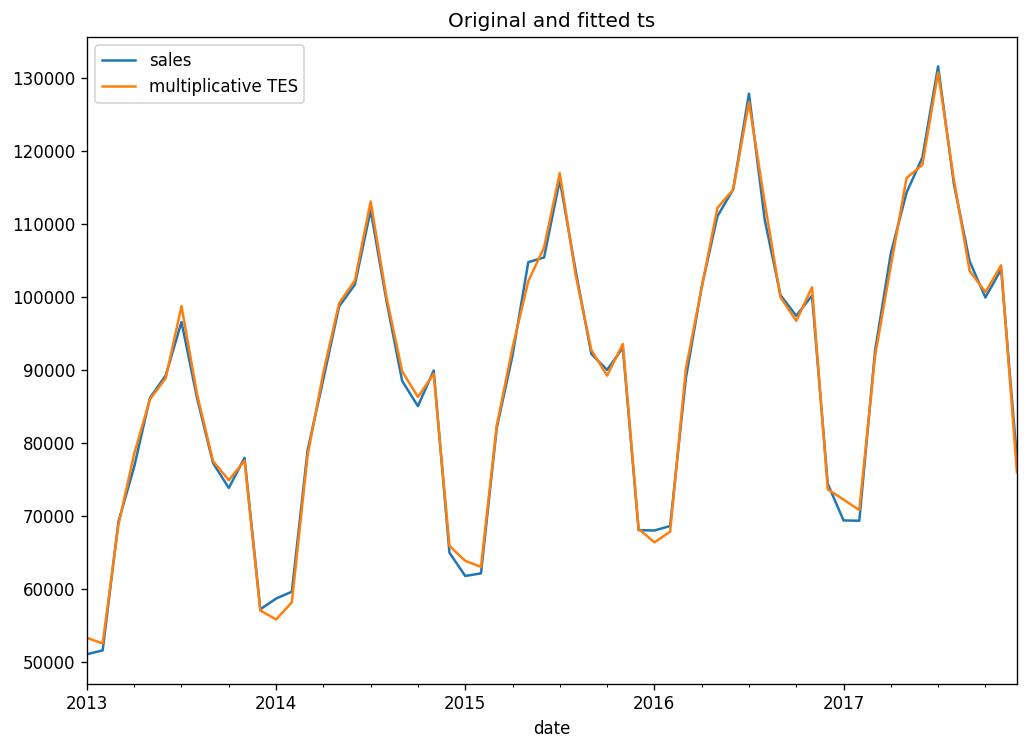

In [162]:
pd.concat([store_ventas_agrup10, HWES3_MUL_fitted], axis=1).plot(title='Original and fitted ts');

In [163]:
HWES3_MUL.summary()

Dep. Variable:,sales,No. Observations:,60
Model:,ExponentialSmoothing,SSE,92937187.462
Optimized:,True,AIC,887.185
Trend:,Multiplicative,BIC,920.695
Seasonal:,Multiplicative,AICC,903.868
Seasonal Periods:,12,Date:,"Sat, 15 Apr 2023"
Box-Cox:,False,Time:,20:36:24
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6060714,alpha,True
smoothing_trend,0.0826461,beta,True


In [164]:
fit1 = ExponentialSmoothing(
    store_ventas_agrup10,
    seasonal_periods=12,
    trend="add",
    seasonal="add",
    initialization_method="estimated",
).fit()

fit2 = ExponentialSmoothing(
    store_ventas_agrup10,
    seasonal_periods=12,
    trend="add",
    seasonal="mul",
    initialization_method="estimated",
).fit()

fit3 = ExponentialSmoothing(
    store_ventas_agrup10,
    seasonal_periods=12,
    trend="mul",
    seasonal="add",
    initialization_method="estimated",
).fit()

fit4 = ExponentialSmoothing(
    store_ventas_agrup10,
    seasonal_periods=12,
    trend="mul",
    seasonal="mul",
    initialization_method="estimated",
).fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [165]:
results2 = pd.DataFrame(
    index=["SSE", "AIC", "BIC"])

In [166]:
results2["Holt Trend-Add Seas-Add"] = [fit1.sse] + [fit1.aic] + [fit1.bic]
results2["Holt Trend-Add Seas-Mul"] = [fit2.sse] + [fit2.aic] + [fit2.bic]
results2["Holt Trend-Mul Seas-Add"] = [fit3.sse] + [fit3.aic] + [fit3.bic]
results2["Holt Trend-Mul Seas-Mul"] = [fit4.sse] + [fit4.aic] + [fit4.bic]

In [167]:
results2

,Holt Trend-Add Seas-Add,Holt Trend-Add Seas-Mul,Holt Trend-Mul Seas-Add,Holt Trend-Mul Seas-Mul
SSE,1.827323e+08,9.010400e+07,1.932322e+08,9.293719e+07
AIC,9.277513e+02,8.853278e+02,9.311035e+02,8.871854e+02
BIC,9.612608e+02,9.188373e+02,9.646130e+02,9.206949e+02


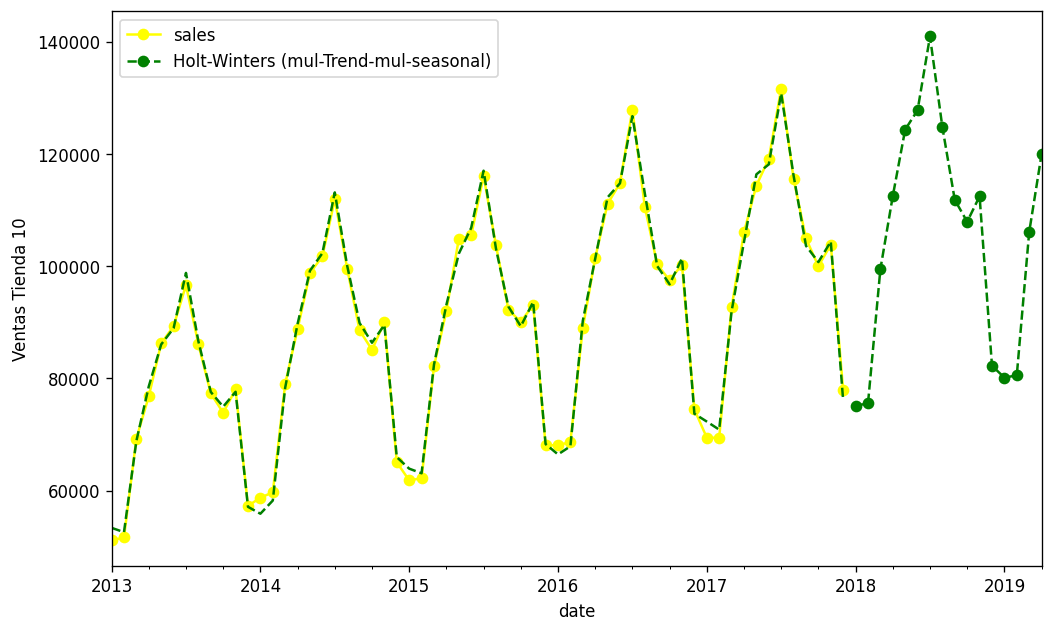

In [169]:
ax = store_ventas_agrup10.plot(
    figsize=(10, 6),
    marker="o",
    color="yellow",
)

ax.set_ylabel("Ventas Tienda 10")
ax.set_xlabel("Mes")
fit4.fittedvalues.plot(ax=ax, style="--", color="green")
fit4.forecast(16).rename("Holt-Winters (mul-Trend-mul-seasonal)").plot(
    ax=ax, style="--", marker="o", color="green", legend=True
)

plt.show()